In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Prediction ##

In [4]:
galton = Table.read_table('data/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [5]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [6]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


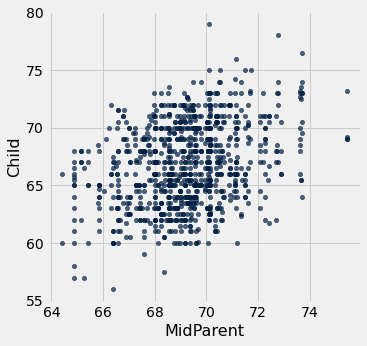

In [7]:
heights.scatter('MidParent')

In [8]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [11]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


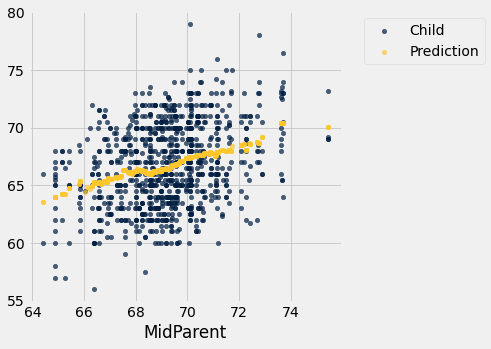

In [10]:
heights_with_predictions.scatter('MidParent')

## Association ##

In [12]:
hybrid = Table.read_table('data/hybrid.csv')

In [40]:
hybrid.show()

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [14]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


In [15]:
hybrid.sort('mpg', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Prius alpha (V),2011,30588.3,10,72.92,Midsize
Auris HSD,2010,35787.3,8.85,68.21,Compact
3008,2011,45101.5,11.36,61.16,Compact
Fit Shuttle,2011,16394.4,7.52,58.8,Minivan
Tino,2000,35355,8.2,54.1,Compact
Lexus HS250h,2009,38478.2,11.55,54.1,Compact
SAI,2009,39172.4,11.55,54.1,Midsize
Insight,2000,18936.4,9.52,53,Two Seater
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater


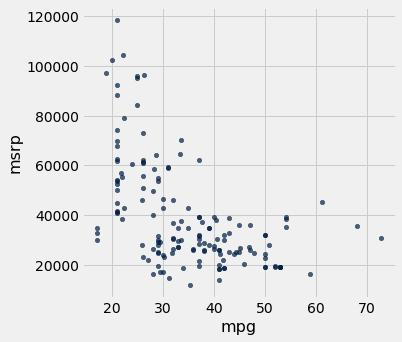

In [16]:
hybrid.scatter('mpg', 'msrp')

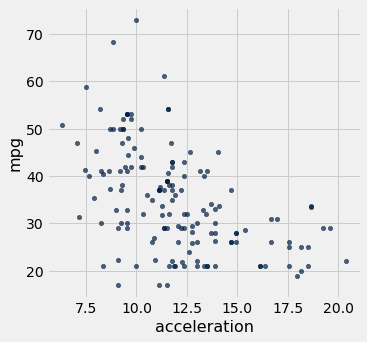

In [41]:
hybrid.scatter('acceleration', 'mpg')

# what is the trend you see? (negative/positive)
# what is the pattern? (shape, linearity)

In [21]:
suv = hybrid.where('class', 'SUV')
#suv.num_rows
suv

vehicle,year,msrp,acceleration,mpg,class
Escape,2004,36676.1,10.32,31.99,SUV
Lexus RX400h,2005,58521.1,12.76,28.23,SUV
Highlander,2005,29186.2,12.76,29.4,SUV
Escape 2WD,2005,19322.6,9.52,29,SUV
Mercury Mariner,2006,34772.4,8.98,32.93,SUV
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV
Kluger,2007,46229.5,12.76,25.87,SUV
Tribute,2007,24823.8,11.28,31.75,SUV
GMC Yukon,2007,57094.8,12.28,21.78,SUV
Vue,2007,22938.3,10.75,26,SUV


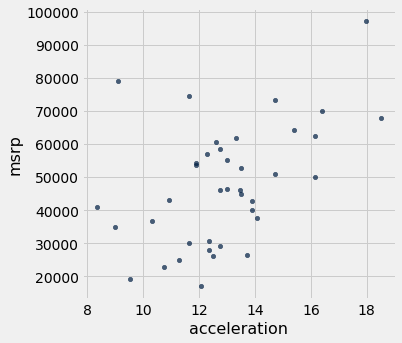

In [22]:
suv.scatter('acceleration', 'msrp')

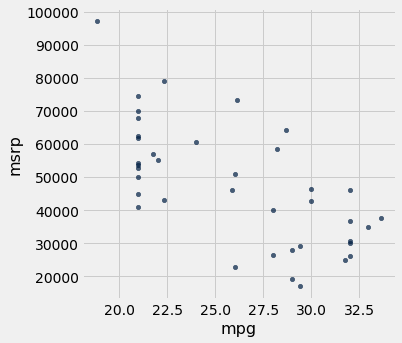

In [23]:
suv.scatter('mpg', 'msrp')

In [24]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

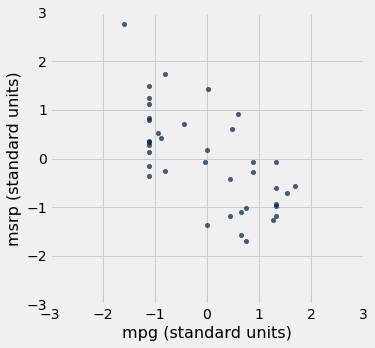

In [25]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

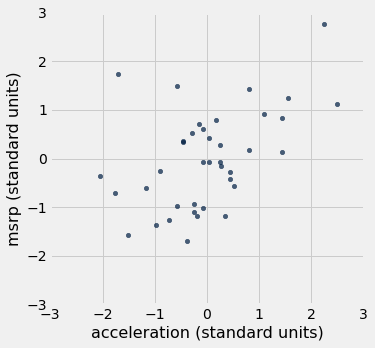

In [26]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Correlation ##

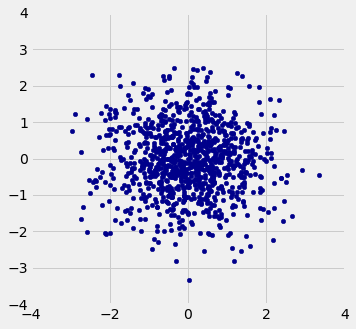

In [30]:
r_scatter(0)

## Calculating $r$ ##

In [31]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


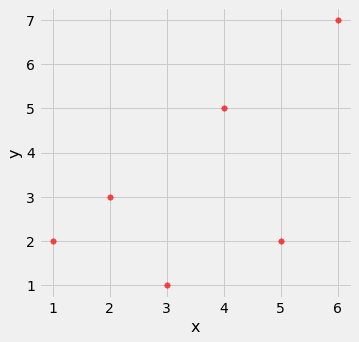

In [32]:
t.scatter('x', 'y', s=30, color='red')

In [33]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [34]:
t = t.with_columns('product of standard units', t.column(2) * t.column(3))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [35]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

0.6174163971897709

In [36]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [37]:
correlation(t, 'x', 'y')

0.6174163971897709

In [38]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [39]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

In [42]:
correlation(hybrid,'acceleration','mpg')

-0.5060703843771186

### Switching Axes ###

In [43]:
correlation(t, 'x', 'y')

0.6174163971897709

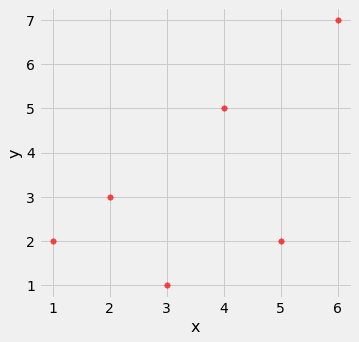

In [44]:
t.scatter('x', 'y', s=30, color='red')

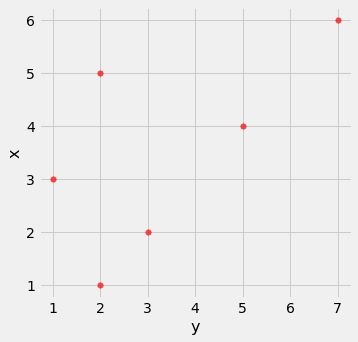

In [45]:
t.scatter('y', 'x', s=30, color='red')

In [48]:
correlation(t, 'y', 'x')

0.6174163971897709

### Nonlinearity ###

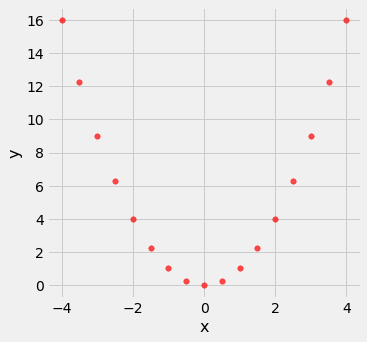

In [51]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')
#nonlinear

In [52]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

x,y
1,1
2,2
3,3
4,4


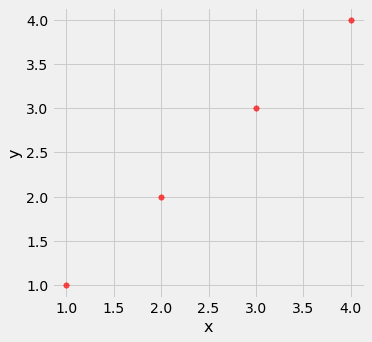

In [54]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')
line

In [55]:
correlation(line, 'x', 'y')

1.0

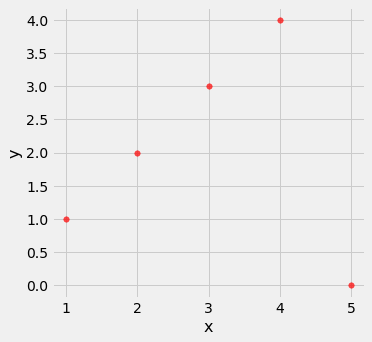

In [56]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')


In [57]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations ###

In [66]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014.sort('Participation Rate')

#LOW participation rate in requiring SAT scores
# tell me what is the correlation between critical reading and math
# in the states with a participation rate of 50% and under?
# compute r (correlation coefficient)
pr_50_under = sat2014.where('Participation Rate', are.below_or_equal_to(50))#.scatter('Critical Reading','Math')
correlation(pr_50_under, 'Critical Reading','Math')
# is there some relationship between the states with a low participation rate?

# HIGH participation rate in requiring SAT scores
# tell me what is the correlation between critical reading and math
# in the states with a participation rate of 50% and higher?
# compute r (correlation coefficient)

# is there some relationship between the states with a low participation rate?
pr_50_under.show()

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
Colorado,14.3,582,586,567,1735
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
Kansas,5.3,591,596,566,1753
Kentucky,4.6,589,585,572,1746
Louisiana,4.6,561,556,550,1667
Michigan,3.8,593,610,581,1784


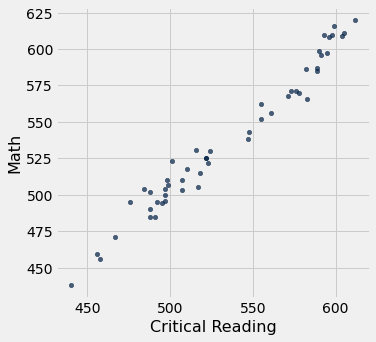

In [59]:
sat2014.scatter('Critical Reading', 'Math')

In [60]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434